In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn as sk
import matplotlib as mpl
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set()
sns.set_color_codes()

%matplotlib inline
%config InlineBackend.figure_format='png'

# python 2
from __future__ import division

#   
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
mpl.rc('xtick', labelsize = 20)
mpl.rc('ytick', labelsize = 20)


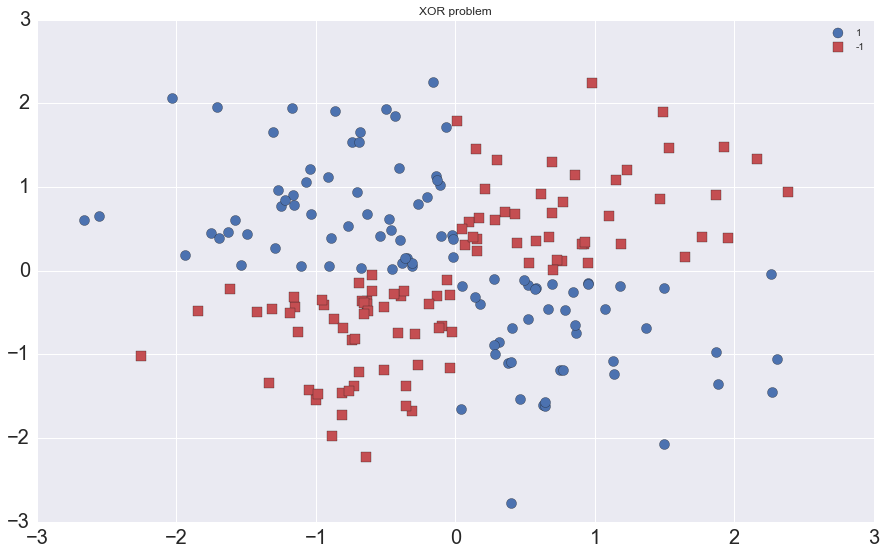

In [8]:
np.random.seed(0)
# 표준정규분포, mu=200, variance = 2
X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:,0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='b', marker='o', label='1', s=100)
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c='r', marker='s', label='-1', s=100)
plt.ylim(-3.0)
plt.legend()
plt.title("XOR problem")
plt.show()

In [16]:
def plot_xor(X, y, model, title, xmin=-3, xmax=3, ymin=-3, ymax=3):
    XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000), np.arange(ymin, ymax, (ymax-ymin)/1000))
    ZZ = np.reshape(model.predict(np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
    plt.contourf(XX, YY, ZZ, cmap = mpl.cm.Paired_r, alpha = 0.5)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='b', marker='o', label = '+1', s=100)
    plt.scatter(X[y == -1, 0], X[y == -1, 1], c='r', marker='s', label = '-1', s = 100)
    
    # 서포트 포인트 찾기
    plt.scatter(model.support_vectors_[y[model.support_] == 1, 0], model.support_vectors_[y[model.support_] == 1,1],
               c = 'b', marker='o', s=150, linewidth=3, facecolor=None)
    plt.scatter(model.support_vectors_[y[model.support_] == -1, 0], model.support_vectors_[y[model.support_] == -1,1],
               c = 'r', marker='s', s=150, linewidth=3, facecolor=None)

    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.title(title)
    plt.show()

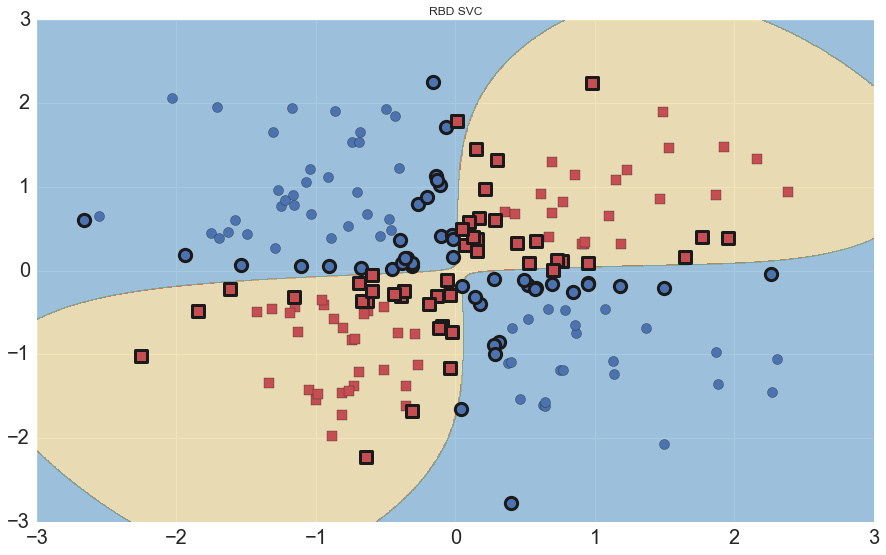

In [17]:
from sklearn.svm import SVC

rbfsvc = SVC(kernel="rbf").fit(X_xor, y_xor)
plot_xor(X_xor, y_xor, rbfsvc, "RBD SVC")

In [19]:
# 어떤게 서포트이냐?,
rbfsvc.support_vectors_[y_xor[rbfsvc.support_]]

array([[ 0.56729028, -0.2226751 ],
       [ 0.56729028, -0.2226751 ],
       [ 0.56729028, -0.2226751 ],
       [ 0.56729028, -0.2226751 ],
       [ 0.56729028, -0.2226751 ],
       [ 0.56729028, -0.2226751 ],
       [ 0.56729028, -0.2226751 ],
       [ 0.56729028, -0.2226751 ],
       [ 0.56729028, -0.2226751 ],
       [ 0.56729028, -0.2226751 ],
       [ 0.56729028, -0.2226751 ],
       [ 0.56729028, -0.2226751 ],
       [ 0.56729028, -0.2226751 ],
       [ 0.56729028, -0.2226751 ],
       [ 0.56729028, -0.2226751 ],
       [ 0.56729028, -0.2226751 ],
       [ 0.56729028, -0.2226751 ],
       [ 0.56729028, -0.2226751 ],
       [ 0.56729028, -0.2226751 ],
       [ 0.56729028, -0.2226751 ],
       [ 0.56729028, -0.2226751 ],
       [ 0.56729028, -0.2226751 ],
       [ 0.56729028, -0.2226751 ],
       [ 0.56729028, -0.2226751 ],
       [ 0.56729028, -0.2226751 ],
       [ 0.56729028, -0.2226751 ],
       [ 0.56729028, -0.2226751 ],
       [ 0.56729028, -0.2226751 ],
       [ 0.56729028,

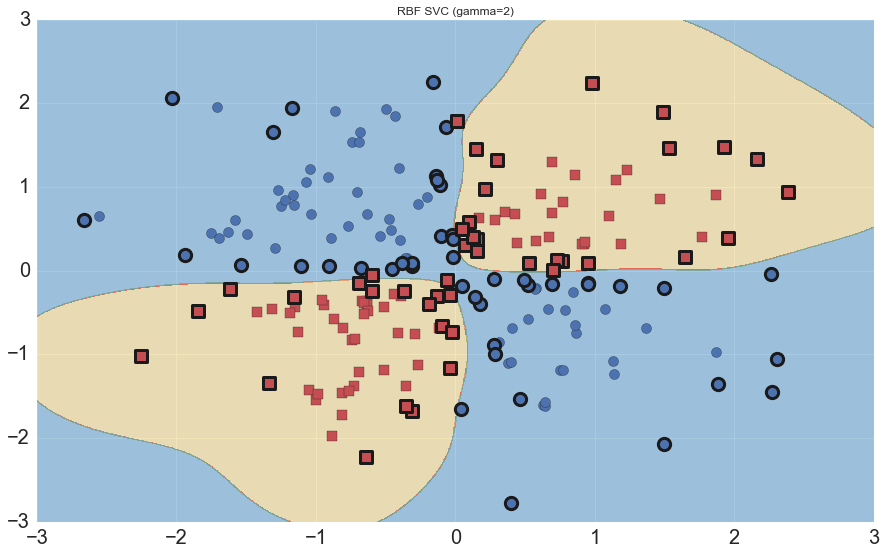

In [20]:
plot_xor(X_xor, y_xor, SVC(kernel="rbf", gamma=2).fit(X_xor, y_xor), "RBF SVC (gamma=2)")

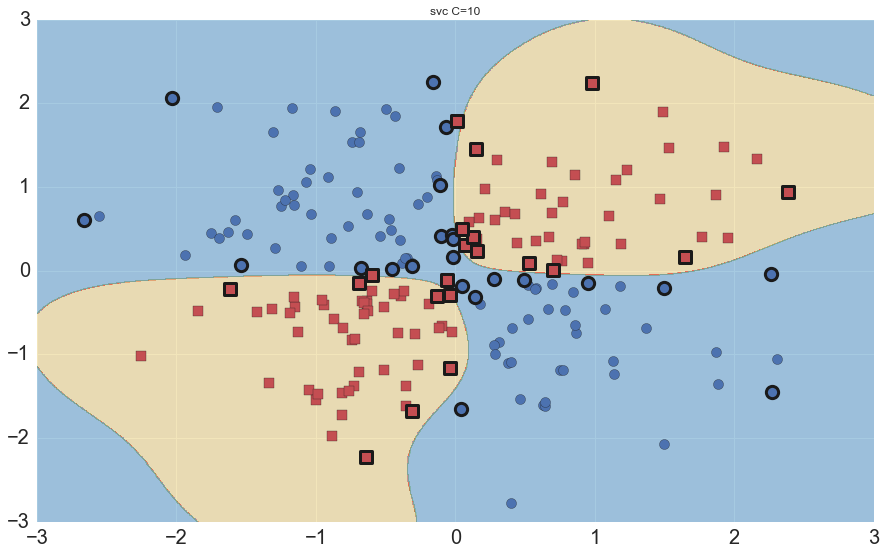

In [27]:
svc = SVC(kernel='rbf', gamma=1, C=10).fit(X_xor, y_xor)
plot_xor(X_xor, y_xor, svc, "svc C=10")

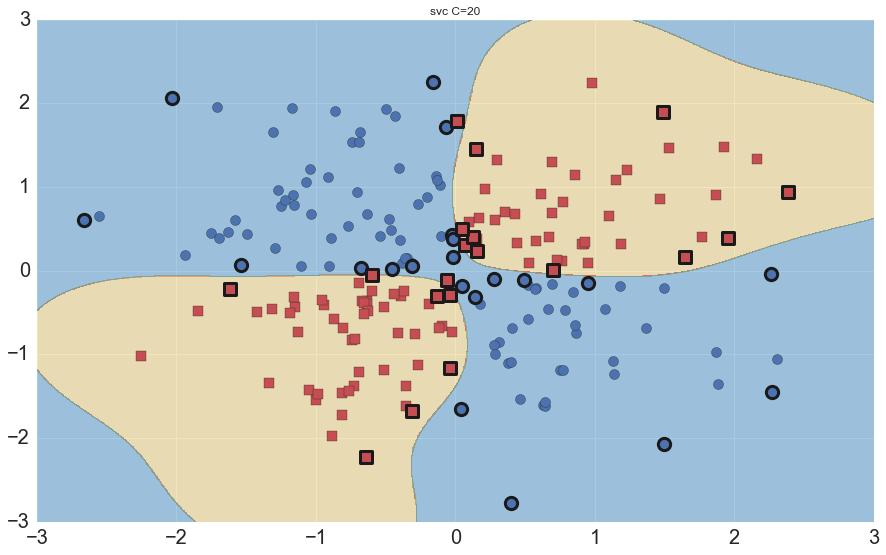

In [28]:
svc = SVC(kernel='rbf', gamma=1, C=20).fit(X_xor, y_xor)
plot_xor(X_xor, y_xor, svc, "svc C=20")

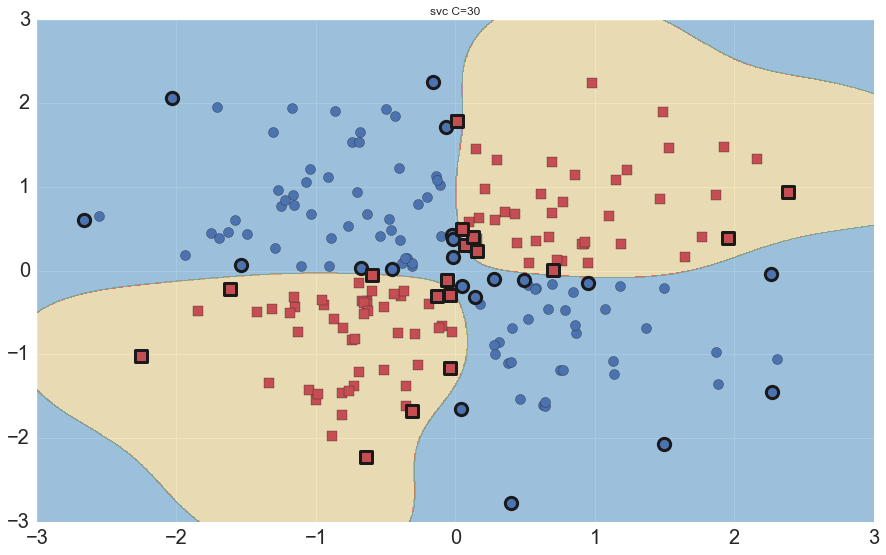

In [29]:
svc = SVC(kernel='rbf', gamma=1, C=30).fit(X_xor, y_xor)
plot_xor(X_xor, y_xor, svc, "svc C=30")

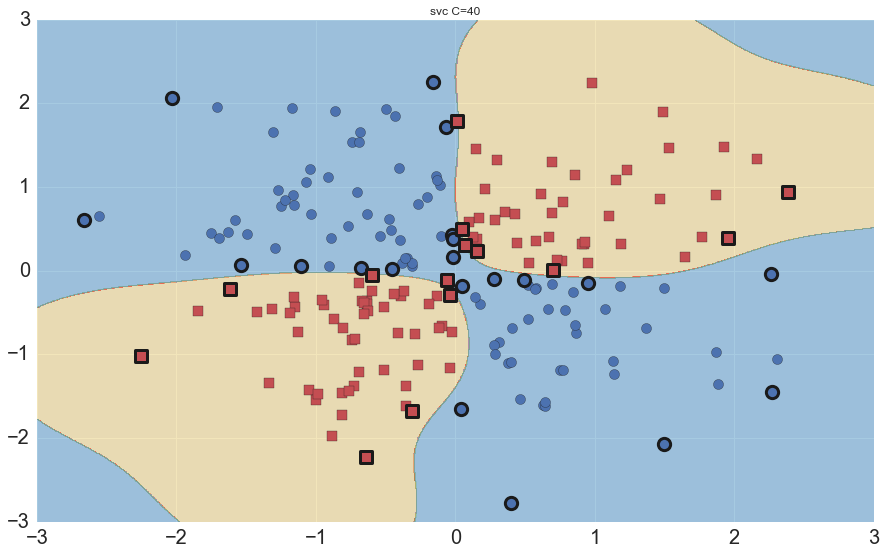

In [30]:
svc = SVC(kernel='rbf', gamma=1, C=40).fit(X_xor, y_xor)
plot_xor(X_xor, y_xor, svc, "svc C=40")

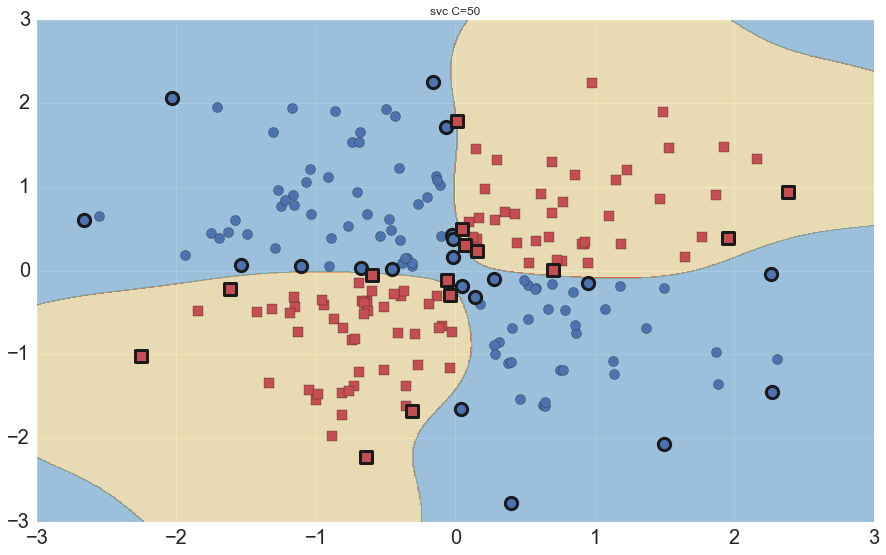

In [31]:
svc = SVC(kernel='rbf', gamma=1, C=50).fit(X_xor, y_xor)
plot_xor(X_xor, y_xor, svc, "svc C=50")

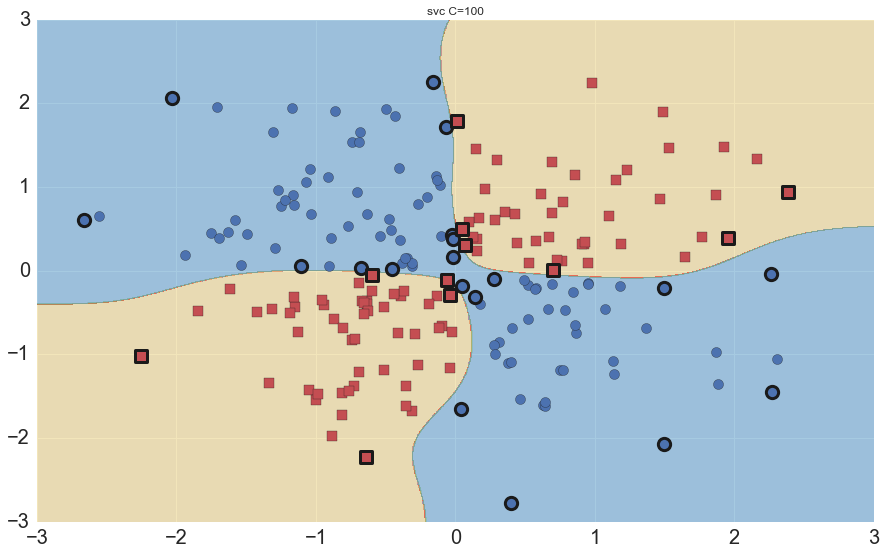

In [32]:
svc = SVC(kernel='rbf', gamma=1, C=100).fit(X_xor, y_xor)
plot_xor(X_xor, y_xor, svc, "svc C=100")

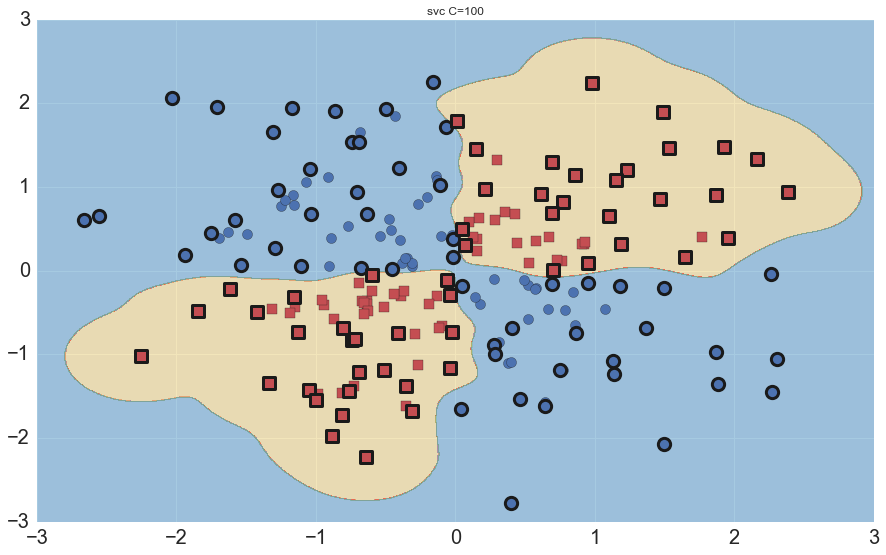

In [33]:
svc = SVC(kernel='rbf', gamma=10, C=100).fit(X_xor, y_xor)
plot_xor(X_xor, y_xor, svc, "svc C=100")

In [ ]:
# from ipywidgets import widgets
# widgets.interact(plot_perceptron, n=widgets.IntSlider(min=1,max=100,step=1,value=1));

# 아이리스

In [38]:
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

# 아이리스 데이터 로드
iris =load_iris()
X = iris.data[:, [2,3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [39]:
def plot_iris(X, y, model, title, xmin = -2.5, xmax=2.5, ymin= -2.5, ymax = 2.5):
    XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax - xmin)/1000), np.arange(ymin, ymax, (ymax-ymin)/1000))
    ZZ = np.reshape(model.predict(np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
    plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Paired_r, alpha=0.5)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c = 'r', marker='^', label='0', s = 100)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c = 'g', marker='o', label='1', s = 100)
    plt.scatter(X[y == 2, 0], X[y == 2, 1], c = 'b', marker='s', label='2', s = 100)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.title(title)
    plt.show()

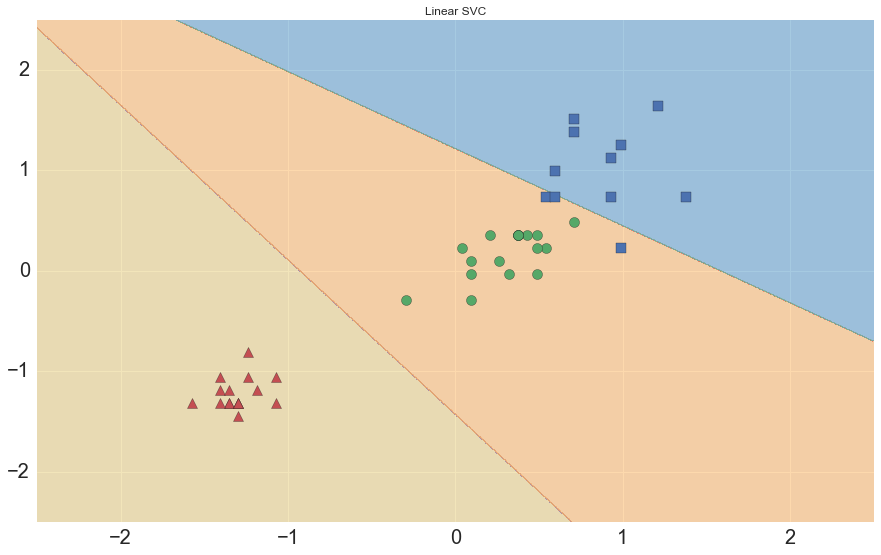

In [40]:
model = SVC(kernel='linear').fit(X_test_std, y_test)
plot_iris(X_test_std, y_test, model, "Linear SVC")

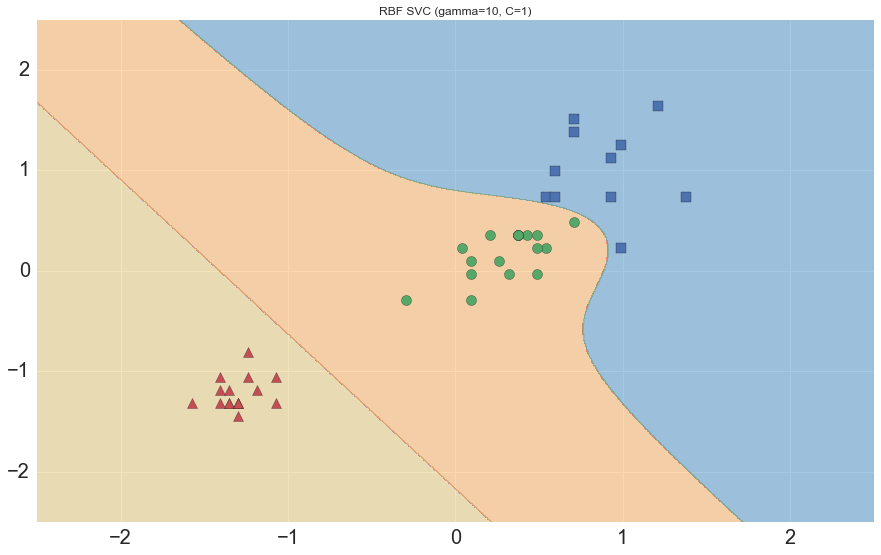

In [41]:
model = SVC(kernel='poly', random_state=0, gamma=10, C=1.0).fit(X_test_std, y_test)
plot_iris(X_test_std, y_test, model, "RBF SVC (gamma=10, C=1)")

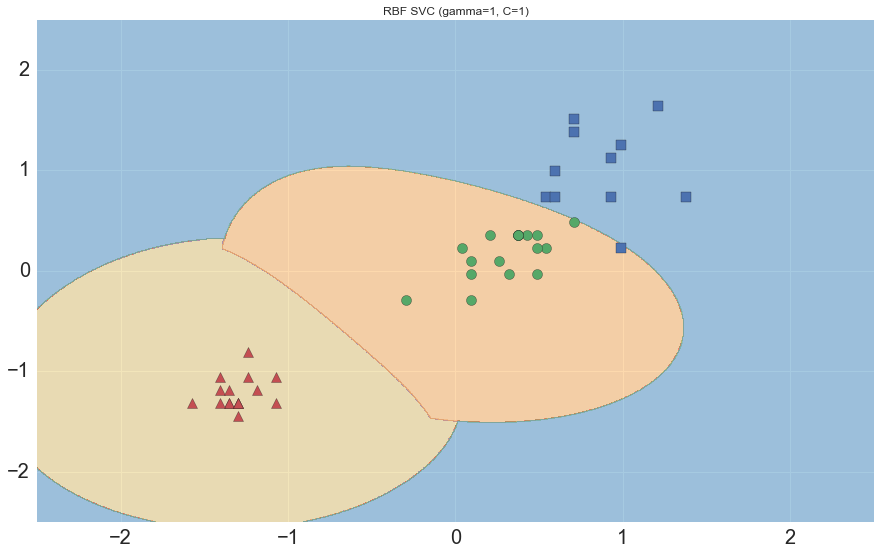

In [42]:
model = SVC(kernel='rbf', random_state=0, gamma=1, C=1.0).fit(X_test_std, y_test)
plot_iris(X_test_std, y_test, model, "RBF SVC (gamma=1, C=1)")